In [1]:
# Challenge link: https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition
# best score: 0.40344 (log loss)

In [1]:
import tensorflow as tf
import keras.backend as K

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, LeakyReLU, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline

In [5]:
from keras_utils import ModelSaveCallback, TqdmProgressCallback

In [6]:
def reset_tf_session():
    K.clear_session()
    tf.reset_default_graph()
    s = K.get_session()
    return s

# Read and prepare data

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255.0, rotation_range=10, width_shift_range=0.1, 
                                   height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, validation_split=0.3)

In [8]:
train_generator = train_datagen.flow_from_directory(directory='./train', target_size=(64, 64), 
                                                    class_mode='categorical', batch_size=64, shuffle=True, subset='training')

Found 17500 images belonging to 2 classes.


In [9]:
val_generator = train_datagen.flow_from_directory(directory='./train', target_size=(64, 64), 
                                                    class_mode='categorical', batch_size=64, shuffle=True, subset='validation')

Found 7500 images belonging to 2 classes.


# Visualize a sample

In [10]:
sample = train_generator.next() # Returns a tuple (image_batch, output_batch)

# image_batch -> [batch_size, target_height, target_width, num_channels]
# output_batch -> [batch_size, num_classes], one-hot encoded output classes

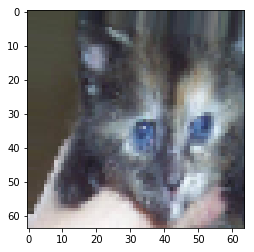

In [11]:
plt.imshow(sample[0][0])

In [12]:
sample[1][0]

array([1., 0.], dtype=float32)

In [13]:
sample[0].shape

(64, 64, 64, 3)

In [14]:
train_generator.reset()

# Create model

In [15]:
def cnn():
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3)))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D())
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    
    model.add(Dense(200))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.2))
    
    model.add(Dense(50))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.2))
    
    model.add(Dense(2, activation='softmax'))
    
    return model

In [16]:
model = cnn()

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
__________

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model_filename = 'dogs_cats.{0:03d}.hdf5'
last_finished_epoch = None

# s = reset_tf_session()
# last_finished_epoch = 97
# model = load_model(model_filename.format(last_finished_epoch - 1))

In [20]:
model.fit_generator(generator=train_generator, 
                    validation_data=val_generator,
                    epochs=50, steps_per_epoch=250,
                    callbacks=[ModelSaveCallback(model_filename), TqdmProgressCallback()],
                    verbose=2, 
                    initial_epoch=last_finished_epoch or 0)

Epoch 1/50
Epoch 1/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 114s - loss: 1.4088 - acc: 0.5727 - val_loss: 0.6389 - val_acc: 0.6152
Model saved in dogs_cats.000.hdf5

Epoch 2/50
Epoch 2/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 100s - loss: 0.6526 - acc: 0.6334 - val_loss: 0.5916 - val_acc: 0.6913
Model saved in dogs_cats.001.hdf5

Epoch 3/50
Epoch 3/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 100s - loss: 0.6098 - acc: 0.6678 - val_loss: 0.6779 - val_acc: 0.6273
Model saved in dogs_cats.002.hdf5

Epoch 4/50
Epoch 4/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 101s - loss: 0.5893 - acc: 0.6897 - val_loss: 0.6385 - val_acc: 0.6661
Model saved in dogs_cats.003.hdf5

Epoch 5/50
Epoch 5/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 104s - loss: 0.5643 - acc: 0.7075 - val_loss: 0.9665 - val_acc: 0.5865
Model saved in dogs_cats.004.hdf5

Epoch 6/50
Epoch 6/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 104s - loss: 0.5476 - acc: 0.7221 - val_loss: 0.5107 - val_acc: 0.7532
Model saved in dogs_cats.005.hdf5

Epoch 7/50
Epoch 7/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 99s - loss: 0.5177 - acc: 0.7457 - val_loss: 0.6599 - val_acc: 0.6323
Model saved in dogs_cats.006.hdf5

Epoch 8/50
Epoch 8/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 99s - loss: 0.5066 - acc: 0.7538 - val_loss: 0.5225 - val_acc: 0.7308
Model saved in dogs_cats.007.hdf5

Epoch 9/50
Epoch 9/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 99s - loss: 0.4781 - acc: 0.7748 - val_loss: 0.4600 - val_acc: 0.7873
Model saved in dogs_cats.008.hdf5

Epoch 10/50
Epoch 10/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 94s - loss: 0.4747 - acc: 0.7727 - val_loss: 0.5221 - val_acc: 0.7399
Model saved in dogs_cats.009.hdf5

Epoch 11/50
Epoch 11/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 94s - loss: 0.4599 - acc: 0.7837 - val_loss: 0.6170 - val_acc: 0.6867
Model saved in dogs_cats.010.hdf5

Epoch 12/50
Epoch 12/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 97s - loss: 0.4438 - acc: 0.7925 - val_loss: 0.5639 - val_acc: 0.7296
Model saved in dogs_cats.011.hdf5

Epoch 13/50
Epoch 13/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 98s - loss: 0.4305 - acc: 0.8030 - val_loss: 0.4657 - val_acc: 0.7753
Model saved in dogs_cats.012.hdf5

Epoch 14/50
Epoch 14/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 98s - loss: 0.4253 - acc: 0.8055 - val_loss: 0.4982 - val_acc: 0.7676
Model saved in dogs_cats.013.hdf5

Epoch 15/50
Epoch 15/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 97s - loss: 0.4216 - acc: 0.8081 - val_loss: 0.5367 - val_acc: 0.7260
Model saved in dogs_cats.014.hdf5

Epoch 16/50
Epoch 16/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 99s - loss: 0.4082 - acc: 0.8128 - val_loss: 0.4791 - val_acc: 0.7827
Model saved in dogs_cats.015.hdf5

Epoch 17/50
Epoch 17/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 107s - loss: 0.4077 - acc: 0.8135 - val_loss: 0.4601 - val_acc: 0.7933
Model saved in dogs_cats.016.hdf5

Epoch 18/50
Epoch 18/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 105s - loss: 0.3873 - acc: 0.8250 - val_loss: 0.4098 - val_acc: 0.8143
Model saved in dogs_cats.017.hdf5

Epoch 19/50
Epoch 19/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 104s - loss: 0.3789 - acc: 0.8279 - val_loss: 0.4329 - val_acc: 0.8031
Model saved in dogs_cats.018.hdf5

Epoch 20/50
Epoch 20/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 103s - loss: 0.3718 - acc: 0.8303 - val_loss: 0.4755 - val_acc: 0.7940
Model saved in dogs_cats.019.hdf5

Epoch 21/50
Epoch 21/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 107s - loss: 0.3712 - acc: 0.8356 - val_loss: 0.4401 - val_acc: 0.7989
Model saved in dogs_cats.020.hdf5

Epoch 22/50
Epoch 22/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 105s - loss: 0.3680 - acc: 0.8379 - val_loss: 0.4906 - val_acc: 0.7823
Model saved in dogs_cats.021.hdf5

Epoch 23/50
Epoch 23/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 104s - loss: 0.3563 - acc: 0.8447 - val_loss: 0.8089 - val_acc: 0.6189
Model saved in dogs_cats.022.hdf5

Epoch 24/50
Epoch 24/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 101s - loss: 0.3562 - acc: 0.8403 - val_loss: 0.4308 - val_acc: 0.8000
Model saved in dogs_cats.023.hdf5

Epoch 25/50
Epoch 25/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 99s - loss: 0.3374 - acc: 0.8513 - val_loss: 0.4585 - val_acc: 0.8000
Model saved in dogs_cats.024.hdf5

Epoch 26/50
Epoch 26/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 98s - loss: 0.3358 - acc: 0.8495 - val_loss: 0.4350 - val_acc: 0.8055
Model saved in dogs_cats.025.hdf5

Epoch 27/50
Epoch 27/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 101s - loss: 0.3299 - acc: 0.8566 - val_loss: 0.5268 - val_acc: 0.7979
Model saved in dogs_cats.026.hdf5

Epoch 28/50
Epoch 28/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 90s - loss: 0.3203 - acc: 0.8589 - val_loss: 0.5686 - val_acc: 0.7564
Model saved in dogs_cats.027.hdf5

Epoch 29/50
Epoch 29/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 90s - loss: 0.3163 - acc: 0.8611 - val_loss: 0.4120 - val_acc: 0.8113
Model saved in dogs_cats.028.hdf5

Epoch 30/50
Epoch 30/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 89s - loss: 0.3049 - acc: 0.8666 - val_loss: 0.4782 - val_acc: 0.7828
Model saved in dogs_cats.029.hdf5

Epoch 31/50
Epoch 31/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 89s - loss: 0.3043 - acc: 0.8678 - val_loss: 0.4139 - val_acc: 0.8304
Model saved in dogs_cats.030.hdf5

Epoch 32/50
Epoch 32/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 89s - loss: 0.2979 - acc: 0.8720 - val_loss: 0.3950 - val_acc: 0.8267
Model saved in dogs_cats.031.hdf5

Epoch 33/50
Epoch 33/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 89s - loss: 0.2890 - acc: 0.8745 - val_loss: 0.3705 - val_acc: 0.8419
Model saved in dogs_cats.032.hdf5

Epoch 34/50
Epoch 34/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 89s - loss: 0.2886 - acc: 0.8735 - val_loss: 0.4574 - val_acc: 0.7955
Model saved in dogs_cats.033.hdf5

Epoch 35/50
Epoch 35/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 89s - loss: 0.2825 - acc: 0.8765 - val_loss: 0.7446 - val_acc: 0.7177
Model saved in dogs_cats.034.hdf5

Epoch 36/50
Epoch 36/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 90s - loss: 0.2698 - acc: 0.8838 - val_loss: 0.5026 - val_acc: 0.7800
Model saved in dogs_cats.035.hdf5

Epoch 37/50
Epoch 37/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 90s - loss: 0.2638 - acc: 0.8885 - val_loss: 0.5532 - val_acc: 0.7961
Model saved in dogs_cats.036.hdf5

Epoch 38/50
Epoch 38/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 92s - loss: 0.2549 - acc: 0.8925 - val_loss: 0.7047 - val_acc: 0.7500
Model saved in dogs_cats.037.hdf5

Epoch 39/50
Epoch 39/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 94s - loss: 0.2589 - acc: 0.8913 - val_loss: 0.4311 - val_acc: 0.8217
Model saved in dogs_cats.038.hdf5

Epoch 40/50
Epoch 40/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 91s - loss: 0.2478 - acc: 0.8939 - val_loss: 0.3796 - val_acc: 0.8376
Model saved in dogs_cats.039.hdf5

Epoch 41/50
Epoch 41/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 90s - loss: 0.2517 - acc: 0.8912 - val_loss: 0.4915 - val_acc: 0.7932
Model saved in dogs_cats.040.hdf5

Epoch 42/50
Epoch 42/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 90s - loss: 0.2454 - acc: 0.8977 - val_loss: 0.4412 - val_acc: 0.8173
Model saved in dogs_cats.041.hdf5

Epoch 43/50
Epoch 43/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 90s - loss: 0.2437 - acc: 0.8960 - val_loss: 0.4678 - val_acc: 0.8184
Model saved in dogs_cats.042.hdf5

Epoch 44/50
Epoch 44/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 91s - loss: 0.2342 - acc: 0.9024 - val_loss: 0.3925 - val_acc: 0.8376
Model saved in dogs_cats.043.hdf5

Epoch 45/50
Epoch 45/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 92s - loss: 0.2307 - acc: 0.9031 - val_loss: 0.4397 - val_acc: 0.8175
Model saved in dogs_cats.044.hdf5

Epoch 46/50
Epoch 46/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 93s - loss: 0.2258 - acc: 0.9067 - val_loss: 0.4751 - val_acc: 0.8229
Model saved in dogs_cats.045.hdf5

Epoch 47/50
Epoch 47/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 101s - loss: 0.2243 - acc: 0.9086 - val_loss: 0.5671 - val_acc: 0.8123
Model saved in dogs_cats.046.hdf5

Epoch 48/50
Epoch 48/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 99s - loss: 0.2223 - acc: 0.9067 - val_loss: 0.4084 - val_acc: 0.8379
Model saved in dogs_cats.047.hdf5

Epoch 49/50
Epoch 49/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 99s - loss: 0.2140 - acc: 0.9126 - val_loss: 0.3957 - val_acc: 0.8339
Model saved in dogs_cats.048.hdf5

Epoch 50/50
Epoch 50/50


HBox(children=(IntProgress(value=0, max=250), HTML(value='')))

 - 97s - loss: 0.2075 - acc: 0.9142 - val_loss: 0.3651 - val_acc: 0.8461
Model saved in dogs_cats.049.hdf5



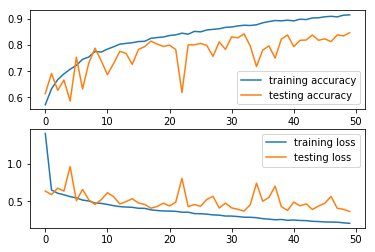

In [22]:
plt.subplot(2, 1, 1)
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.legend(['training accuracy', 'testing accuracy'])

plt.subplot(2, 1, 2)
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['training loss', 'testing loss'])

In [23]:
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [24]:
test_generator = test_datagen.flow_from_directory(directory='./testw', target_size=(64, 64), 
                                                    class_mode='categorical', batch_size=1, shuffle=False)

Found 12500 images belonging to 1 classes.


In [25]:
predictions = model.predict_generator(test_generator, steps=len(test_generator.filenames))

In [26]:
predictions.argmax(axis=1).shape

(12500,)

(array([3067.,  464.,  313.,  236.,  187.,  145.,  145.,  107.,   94.,
          89.,   88.,   96.,   82.,   81.,   74.,   55.,   70.,   63.,
          45.,   55.,   66.,   60.,   58.,   60.,   57.,   49.,   45.,
          48.,   57.,   57.,   50.,   37.,   51.,   51.,   38.,   39.,
          47.,   47.,   41.,   44.,   58.,   41.,   34.,   49.,   50.,
          42.,   42.,   43.,   36.,   52.,   38.,   41.,   50.,   38.,
          35.,   49.,   38.,   41.,   63.,   57.,   54.,   53.,   33.,
          39.,   42.,   53.,   59.,   59.,   59.,   47.,   48.,   51.,
          53.,   57.,   46.,   52.,   51.,   49.,   47.,   48.,   66.,
          50.,   65.,   55.,   61.,   66.,   67.,   77.,   88.,   68.,
          96.,  103.,  112.,  125.,  129.,  159.,  203.,  259.,  349.,
        1847.]),
 array([1.35786353e-14, 1.00000000e-02, 2.00000000e-02, 3.00000000e-02,
        4.00000000e-02, 5.00000000e-02, 6.00000000e-02, 7.00000000e-02,
        8.00000000e-02, 9.00000000e-02, 1.00000000e-01, 1.

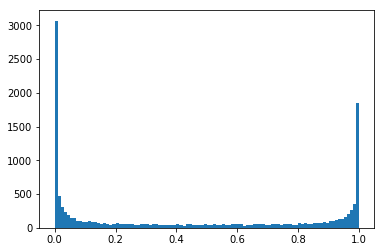

In [27]:
plt.hist(predictions[:,0], bins=100)

In [28]:
predictions[:, 1].mean()

0.5599054

In [29]:
predictions[:, 1].std()

0.41354954

In [30]:
result = pd.DataFrame(data={'id': test_generator.filenames, 'label': predictions[:, 1]})

In [31]:
result.head()

,id,label
0,test\1.jpg,0.991737
1,test\10.jpg,0.006378
2,test\100.jpg,0.607799
3,test\1000.jpg,0.999990
4,test\10000.jpg,0.952211


In [32]:
result['id'] = result['id'].apply(lambda x: x[x.index('\\') + 1 : x.index('.')])

In [33]:
result.head()

,id,label
0,1,0.991737
1,10,0.006378
2,100,0.607799
3,1000,0.999990
4,10000,0.952211


In [34]:
result.to_csv('submission.csv', index=False)